In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

per_game = 'NBA_2017_2018_Statistics.csv'
per_36min = 'NBA_2017_2018_Statistics_per_36 min.csv'
nba_salary = 'NBA_season17_18_salary.csv'

per_game = pd.read_csv(per_game)
per_36min = pd.read_csv(per_36min)
nba_salary = pd.read_csv(nba_salary)

per_game = pd.DataFrame(per_game)
per_36min = pd.DataFrame(per_36min)
nba_salary = pd.DataFrame(nba_salary)

In [48]:
per_36min_df = pd.merge(per_36min, nba_salary, on= "Player & Team", how="outer")
per_36min_df = per_36min_df.drop(columns=['Player & Team','Player_y', 'Team_y','ORB','DRB',
                                        '3P','3PA','3P%','2P','2PA','2P%'])
per_36min_df = per_36min_df.rename(columns={'Player_x':'Player','Team_x':'Team'})
per_36min_df = per_36min_df.dropna()

#82 games x 48 minutes per game = 3,936 minutes per game 

per_36min_df["Salary per min"] = round(per_36min_df["season17_18"]/3936,2)
per_36min_df["Salary per 36 min"] = per_36min_df["Salary per min"] * 36

#calculate avg. missed field goal attempts

per_36min_df["FGM"] = per_36min_df["FGA"] - per_36min_df["FG"]

#calculate avg. missed free throw attempts

per_36min_df["FTM"] = per_36min_df["FTA"] - per_36min_df["FT"]

#calculate player efficiency formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

per_36min_df["Player Efficiency Rating"] = per_36min_df["PTS"] + per_36min_df["TRB"] + per_36min_df["AST"] + per_36min_df["STL"] + per_36min_df["BLK"] - per_36min_df["FGM"] - per_36min_df["FTM"]

per_36min_df.reset_index()

,index,Player,Team,Pos,Age,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,season17_18,Salary per min,Salary per 36 min,FGM,FTM,Player Efficiency Rating
0,0,Aaron Brooks,MIN,PG,33.0,32.0,1.0,189.0,5.3,13.1,...,0.0,2.1,5.3,14.3,2116955.0,537.84,19362.24,7.8,0.6,14.0
1,1,Aaron Gordon,ORL,PF,22.0,58.0,57.0,1909.0,7.1,16.3,...,0.8,2.0,2.1,19.3,5504420.0,1398.48,50345.28,9.2,1.2,22.0
2,4,Abdel Nader,BOS,SF,24.0,48.0,1.0,522.0,3.4,10.3,...,0.7,2.3,3.1,10.1,1167333.0,296.58,10676.88,6.9,1.1,10.5
3,6,Al Horford,BOS,C,31.0,72.0,72.0,2277.0,5.8,11.9,...,1.2,2.1,2.2,14.7,27734405.0,7046.34,253668.24,6.1,0.4,23.9
4,7,Al Jefferson,IND,C,33.0,36.0,1.0,484.0,8.3,15.5,...,1.7,1.6,4.9,18.7,9769821.0,2482.17,89358.12,7.2,0.5,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,535,Zach Collins,POR,C,20.0,66.0,1.0,1045.0,4.0,10.0,...,1.1,2.0,4.6,10.1,3057240.0,776.74,27962.64,6.0,0.5,14.7
376,536,Zach LaVine,CHI,SG,22.0,24.0,24.0,656.0,7.5,19.5,...,0.2,2.4,3.0,22.0,3202217.0,813.57,29288.52,12.0,1.1,19.6
377,537,Zach Randolph,SAC,PF,36.0,59.0,57.0,1508.0,8.6,18.2,...,0.2,2.8,2.8,20.5,12307692.0,3126.95,112570.20,9.6,0.6,24.0
378,538,Zaza Pachulia,GSW,C,33.0,69.0,57.0,972.0,5.5,9.8,...,0.6,2.7,4.5,13.8,3477600.0,883.54,31807.44,4.3,0.6,26.8


In [49]:
#Games Played
avg = per_36min_df['G'].mean()

quartiles = per_36min_df['G'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'Average games played is {avg}')
print(quartiles)
print(iqr)

Values below -7.5 could be outliers.
Values above 124.5 could be outliers.
Average games played is 57.13157894736842
0.25    42.0
0.50    65.0
0.75    75.0
Name: G, dtype: float64
33.0


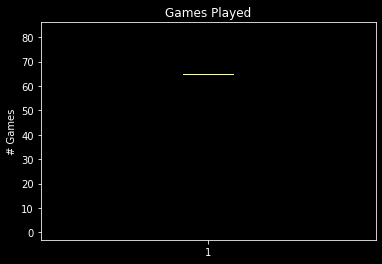

In [50]:
count_games = per_36min_df['G']
fig, ax = plt.subplots()
ax.set_title('Games Played')
ax.set_ylabel('# Games')
ax.boxplot(count_games)
plt.show()

In [51]:
bins = [ 0 , 11 , 21 , 31 , 41 , 51 , 61 , 71,  83]
group_names = ['0 - 10 games' , '10 - 20 games' , '20 - 30 games' , '30 - 40 games', '40 - 50 games', '50 - 60  games', '60 - 70', '70 or more games']

per_36min_df["Game Bins"] = pd.cut(per_36min_df["G"], bins, labels=group_names, include_lowest=True)
games_group = per_36min_df.groupby(["Game Bins"])
games_bins = games_group['G'].count()
games_bins

Game Bins
0 - 10 games         20
10 - 20 games        28
20 - 30 games        21
30 - 40 games        25
40 - 50 games        18
50 - 60  games       56
60 - 70              67
70 or more games    145
Name: G, dtype: int64

In [52]:
#['Player''Team''MP', 'FG', 'FGA','FGM','FT', 'FTA','FTM','TRB', 'AST', 'STL', 'BLK', 'TOV','PTS',
#'season17_18', 'Salary per min', 'Salary per 36 min']


In [53]:
per_36min_df = per_36min_df[['Player','Team','MP','G','season17_18','Salary per 36 min','Player Efficiency Rating']]
per_36min_df['Player Efficiency/ Yearly Salary'] =per_36min_df['Player Efficiency Rating'] / per_36min_df['season17_18'] * 1000
per_36min_df = per_36min_df.loc[per_36min_df['G'] >= 30]
per_36min_df = per_36min_df.sort_values(['season17_18'], ascending=False)
per_36min_df

C:\Users\dinom\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,34.0,0.000980
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,36.0,0.001082
417,Paul Millsap,DEN,1143.0,38.0,31269231.0,285999.12,22.2,0.000710
314,Kyle Lowry,TOR,2510.0,78.0,28703704.0,262533.96,25.4,0.000885
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,33.9,0.001188
...,...,...,...,...,...,...,...,...
231,Jawun Evans,LAC,778.0,48.0,815615.0,7459.92,13.1,0.016061
86,Dakari Johnson,OKC,161.0,31.0,815615.0,7459.92,19.0,0.023295
497,Trey Burke,NYK,785.0,36.0,784160.0,7172.28,23.9,0.030478
503,Tyler Cavanaugh,ATL,518.0,39.0,729919.0,6676.20,18.1,0.024797


In [56]:
#calculate player efficiency formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)
per_game['Efficiency'] = (per_game['PTS'] + 
                          per_game['TRB'] + 
                          per_game['AST'] + 
                          per_game['STL']+
                          per_game['BLK']-
                          (per_game['FGA']-per_game['FG'])-
                          (per_game['FTA']-per_game['FT'])- 
                          per_game['TOV'])
per_game = per_game.sort_values(['Efficiency'], ascending=False)
per_game = per_game.loc[per_game['G'] >= 30]

per_game = pd.merge(per_game, nba_salary, on= "Player & Team", how="outer")
per_game = per_game.drop(columns=['Player_y', 'Team_y','Player & Team'])
per_game = per_game.rename(columns={'Player_x':'Player','Team_x':'Team'})
per_game = per_game.dropna()
per_game = per_game.sort_values(['season17_18'], ascending=False)

In [57]:
grp_salary = per_game.groupby(['Team'])
grp_salary = grp_salary['season17_18'].sum()

In [58]:
grp_salary.head()

Team
ATL     53127738.0
BOS     80106075.0
BRK     68357736.0
CHI     42157567.0
CHO    114268109.0
Name: season17_18, dtype: float64

In [59]:
grp_salary.tail()

Team
SAC     45159088.0
SAS     91651268.0
TOR     97601866.0
UTA     68615147.0
WAS    108591825.0
Name: season17_18, dtype: float64

In [60]:
#Player Salary

avgs = round(per_game['season17_18'].mean(),2)

quartiles_s = per_game['season17_18'].quantile([.25,.5,.75])
lowerq_s = quartiles_s[0.25]
upperq_s = quartiles_s[0.75]
iqr_s = upperq_s-lowerq_s

lower_bounds= lowerq_s - (1.5*iqr_s)
upper_bounds = upperq_s + (1.5*iqr_s)
print(f"Values below {lower_bounds} could be outliers.")
print(f"Values above {upper_bounds} could be outliers.")
print(f'Average player salary is {avgs}')
print(quartiles_s)
print(iqr_s)

Values below -13619238.0 could be outliers.
Values above 27863850.0 could be outliers.
Average player salary is 7895393.84
0.25     1936920.0
0.50     4468800.0
0.75    12307692.0
Name: season17_18, dtype: float64
10370772.0


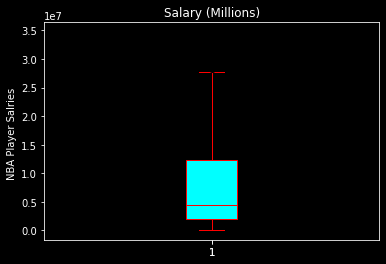

In [61]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

salary_player = per_game['season17_18']
fig, ax = plt.subplots()
ax.set_title('Salary (Millions)')
ax.set_ylabel('NBA Player Salries ')
ax.boxplot(salary_player)
draw_plot(salary_player, 'red', 'cyan')


plt.show()

In [62]:
#Efficiency per game

avg = round(per_game['Efficiency'].mean(),2)

quartiles_p = per_game['Efficiency'].quantile([.25,.5,.75])
lowerq_p = quartiles_p[0.25]
upperq_p = quartiles_p[0.75]
iqr_p = upperq_p-lowerq_p

lower_boundp= lowerq_p - (1.5*iqr_p)
upper_boundp = upperq_p + (1.5*iqr_p)
print(f"Values below {lower_boundp} could be outliers.")
print(f"Values above {upper_boundp} could be outliers.")
print(f'Average game Efficiency is {avg}')
print(quartiles_p)
print(iqr_p)

Values below -4.599999999999996 could be outliers.
Values above 26.599999999999994 could be outliers.
Average game Efficiency is 11.67
0.25     7.1
0.50    10.6
0.75    14.9
Name: Efficiency, dtype: float64
7.799999999999997


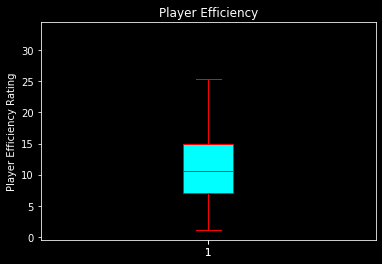

In [63]:
efficiency_games = per_game['Efficiency']
fig, ax = plt.subplots()
ax.set_title('Player Efficiency')
ax.set_ylabel('Player Efficiency Rating')
ax.boxplot(efficiency_games)
draw_plot(efficiency_games, 'red', 'cyan')
plt.show()

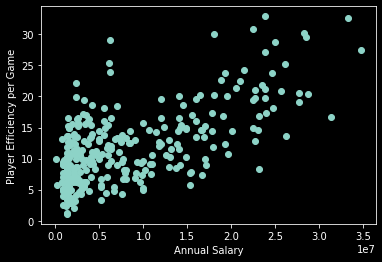

In [64]:
#Based on the Scatter many underperforming players based on salary and efficiency
#Based on the Scatter many overperforming players based on salary and efficiency "The Gold"
x_values = per_game['season17_18']
y_values = per_game['Efficiency']
plt.scatter(x_values,y_values)
plt.xlabel('Annual Salary')
plt.ylabel('Player Efficiency per Game')
plt.style.use('dark_background')
plt.gca().xaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='y', colors='white')

plt.show()

In [65]:
#Used for line graphs Kevin created
salarygroup_by = per_game.groupby(['Team']).sum()
salarygroup_by = salarygroup_by.sort_values(['season17_18'], ascending=False)

In [18]:
top10 = per_game.head(20)
top10 = top10[['Player','season17_18','Efficiency']].set_index('Player')
top10 = top10.rename(columns={"season17_18":"Salary (mil.)"})
top10['Salary (mil.)'] = top10['Salary (mil.)'].map('{:,}'.format)

top10

,Salary (mil.),Efficiency
Player,,
Stephen Curry,"34,682,550.0",27.5
LeBron James,"33,285,709.0",32.7
Paul Millsap,"31,269,231.0",16.7
Kyle Lowry,"28,703,704.0",20.4
Russell Westbrook,"28,530,608.0",29.6
James Harden,"28,299,399.0",30.2
DeMar DeRozan,"27,739,975.0",20.5
Al Horford,"27,734,405.0",19.1
Carmelo Anthony,"26,243,760.0",13.7


In [19]:
top20eff = per_game.loc[(per_game['Efficiency'] >= 18)& (per_game['season17_18'] <= 10000000)]
top20eff = top20eff[['Player','season17_18','Efficiency']].set_index('Player')
top20eff = top20eff.rename(columns={"season17_18":"Salary (mil.)"})
top20eff['Salary (mil.)'] = top20eff['Salary (mil.)'].map('{:,}'.format)

top20eff

,Salary (mil.),Efficiency
Player,,
Lou Williams,"7,000,000.0",18.5
Karl-Anthony Towns,"6,216,840.0",29.1
Ben Simmons,"6,168,840.0",23.9
Joel Embiid,"6,100,266.0",25.4
Aaron Gordon,"5,504,420.0",18.2
Julius Randle,"4,149,242.0",18.7
Tyreke Evans,"3,290,000.0",19.4
Clint Capela,"2,334,520.0",22.2
Devin Booker,"2,319,360.0",19.9


In [20]:
bins = [ 0, 5000001, 10000001, 15000001, 20000001, 25000001, 30000001, 35000001]
group_names = ['0 to 5 mil', '5 to 10 mil', '10 to 15 mil', '15 to 20 mil', '20 to 25 mil', '25 to 30 mil', '30 to 35 mil']

per_game["Salary Bins"] = pd.cut(per_game["season17_18"], bins, labels=group_names, include_lowest=True)
salary_bins = per_game.groupby(["Salary Bins"])
salary_bins = salary_bins['season17_18'].count()

In [21]:
salary_bins = pd.DataFrame(salary_bins)
salary_bins['season17_18'].sum()

309

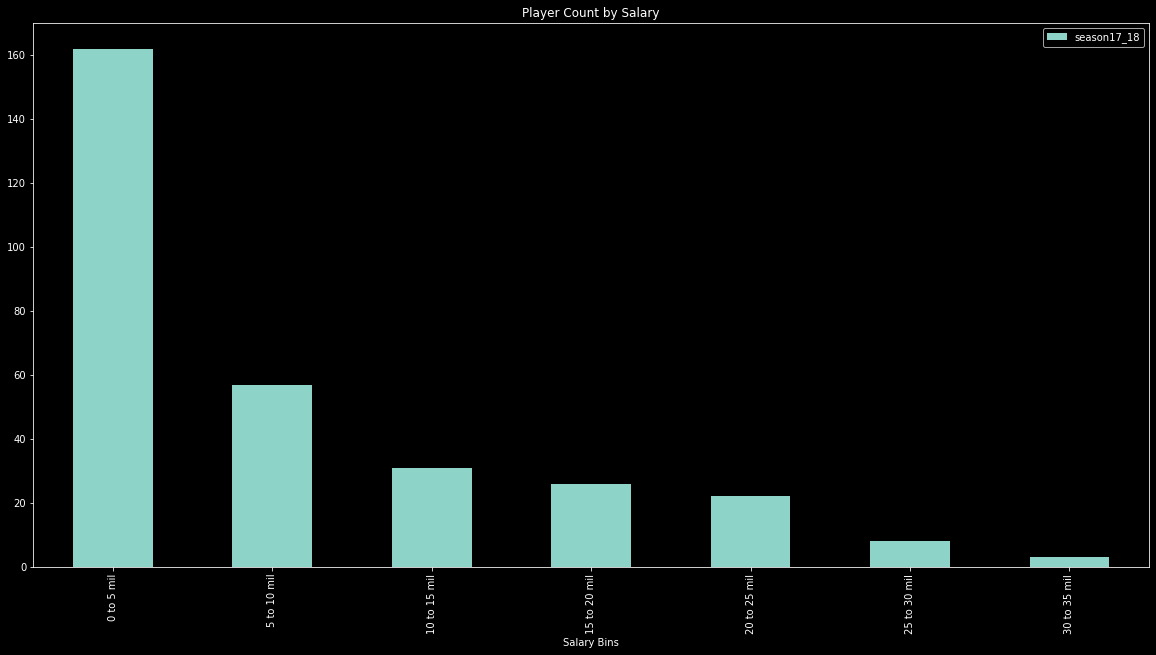

In [22]:
salary_bins.plot(kind="bar", figsize=(20,10), title = "Player Count by Salary")

In [23]:
salary_bins['%'] = (salary_bins['season17_18'] / 309) * 100
salary_bins

,season17_18,%
Salary Bins,,
0 to 5 mil,162,52.427184
5 to 10 mil,57,18.446602
10 to 15 mil,31,10.032362
15 to 20 mil,26,8.414239
20 to 25 mil,22,7.119741
25 to 30 mil,8,2.588997
30 to 35 mil,3,0.970874


In [24]:
# Underperforming players recommended to be traded or cut
salaryabove15mil = per_game.loc[per_game['season17_18'] >= 15000000]
salaryabove15mil = salaryabove15mil.loc[salaryabove15mil['Efficiency'] <= 14.6]
salaryabove15mil

,Player,Team,Pos,Age,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Efficiency,season17_18,Salary Bins
117,Carmelo Anthony,OKC,PF,33.0,78.0,78.0,32.1,6.1,15.0,0.404,...,5.8,1.3,0.6,0.6,1.3,2.5,16.2,13.7,26243760.0,25 to 30 mil
264,Chandler Parsons,MEM,SF,29.0,36.0,8.0,19.2,3.0,6.5,0.462,...,2.5,1.9,0.5,0.3,1.0,1.5,7.9,8.3,23112004.0,20 to 25 mil
138,Brook Lopez,LAL,C,29.0,74.0,72.0,23.4,5.0,10.7,0.465,...,4.0,1.7,0.4,1.3,1.3,2.6,13.0,12.8,22642350.0,20 to 25 mil
104,Serge Ibaka,TOR,PF,28.0,76.0,76.0,27.5,5.0,10.3,0.483,...,6.3,0.8,0.4,1.3,1.2,2.8,12.6,14.5,20061729.0,20 to 25 mil
184,Ryan Anderson,HOU,PF,29.0,66.0,50.0,26.1,3.1,7.3,0.431,...,5.0,0.9,0.4,0.3,0.6,1.9,9.3,10.8,19578455.0,15 to 20 mil
148,Allen Crabbe,BRK,SG,25.0,75.0,68.0,29.3,4.5,11.0,0.407,...,4.3,1.6,0.6,0.5,1.0,2.2,13.2,12.4,19332500.0,15 to 20 mil
161,Wesley Matthews,DAL,SF,31.0,63.0,62.0,33.8,4.5,11.1,0.406,...,3.1,2.7,1.2,0.3,1.3,2.2,12.7,11.8,17884176.0,15 to 20 mil
109,Kentavious Caldwell-Pope,LAL,SG,24.0,74.0,74.0,33.2,4.6,10.8,0.426,...,5.2,2.2,1.4,0.2,1.3,2.0,13.4,14.4,17745894.0,15 to 20 mil
244,Evan Turner,POR,SF,29.0,79.0,40.0,25.7,3.3,7.3,0.447,...,3.1,2.2,0.6,0.4,1.3,2.1,8.2,9.0,17131148.0,15 to 20 mil
214,Bismack Biyombo,ORL,C,25.0,82.0,25.0,18.2,2.2,4.3,0.520,...,5.7,0.8,0.3,1.2,1.0,1.9,5.7,9.9,17000000.0,15 to 20 mil


In [25]:
salaryabove15mil['Age'].mean()

29.055555555555557

In [26]:
# Overperforming players recommended to be extended or be picked up during free agency
salarybelow10mil = per_game.loc[per_game['season17_18'] <= 10000000]
salarybelow10mil = salarybelow10mil.loc[salarybelow10mil['Efficiency'] >= 14.6]
salarybelow10mil

,Player,Team,Pos,Age,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Efficiency,season17_18,Salary Bins
79,Darren Collison,IND,PG,30.0,69.0,64.0,29.2,4.6,9.2,0.495,...,2.6,5.3,1.3,0.2,1.2,1.8,12.4,15.7,10000000.0,5 to 10 mil
47,Lou Williams,LAC,SG,31.0,79.0,19.0,32.8,7.4,16.9,0.435,...,2.5,5.3,1.1,0.2,3.0,1.3,22.6,18.5,7000000.0,5 to 10 mil
70,Lonzo Ball,LAL,PG,20.0,52.0,50.0,34.2,3.9,10.8,0.360,...,6.9,7.2,1.7,0.8,2.6,2.3,10.2,16.5,6286560.0,5 to 10 mil
6,Karl-Anthony Towns,MIN,C,22.0,82.0,82.0,35.6,7.8,14.3,0.545,...,12.3,2.4,0.8,1.4,1.9,3.5,21.3,29.1,6216840.0,5 to 10 mil
15,Ben Simmons,PHI,PG,21.0,81.0,81.0,33.7,6.7,12.3,0.545,...,8.1,8.2,1.7,0.9,3.4,2.6,15.8,23.9,6168840.0,5 to 10 mil
11,Joel Embiid,PHI,C,23.0,63.0,63.0,30.3,8.1,16.8,0.483,...,11.0,3.2,0.6,1.8,3.7,3.3,22.9,25.4,6100266.0,5 to 10 mil
84,Dewayne Dedmon,ATL,C,28.0,62.0,46.0,24.9,4.0,7.7,0.524,...,7.9,1.5,0.6,0.8,1.4,2.6,10.0,15.4,6000000.0,5 to 10 mil
96,Jayson Tatum,BOS,SF,19.0,80.0,80.0,30.5,5.0,10.4,0.475,...,5.0,1.6,1.0,0.7,1.4,2.1,13.9,14.9,5645400.0,5 to 10 mil
76,Brandon Ingram,LAL,SF,20.0,59.0,59.0,33.5,6.1,12.9,0.470,...,5.3,3.9,0.8,0.7,2.5,2.8,16.1,16.0,5519400.0,5 to 10 mil
49,Aaron Gordon,ORL,PF,22.0,58.0,57.0,32.9,6.5,14.9,0.434,...,7.9,2.3,1.0,0.8,1.8,1.9,17.6,18.2,5504420.0,5 to 10 mil


In [27]:
salarybelow10mil['Age'].mean()

22.966666666666665

In [28]:
bins = [ 0, 22, 26, 30, 34, 38, 42]
group_names = ['18 - 21 years', '22 - 25 years', '26 -29 years', '30 - 33 years', '34 - 37 years', '38 and older']

per_game["Age Bins"] = pd.cut(per_game["Age"], bins, labels=group_names, include_lowest=True)
age_salary_bins = per_game.groupby(["Age Bins","Salary Bins"])
age_salary_bins = age_salary_bins['season17_18'].count()
age_salary_bins = pd.DataFrame(age_salary_bins)
age_salary_bins = age_salary_bins.loc[age_salary_bins['season17_18'] > 0]
age_salary_bins

season17_18
Age Bins      Salary Bins              
18 - 21 years 0 to 5 mil             49
              5 to 10 mil            10
22 - 25 years 0 to 5 mil             76
              5 to 10 mil            12
              10 to 15 mil            9
              15 to 20 mil            8
              20 to 25 mil           10
26 -29 years  0 to 5 mil             20
              5 to 10 mil            21
              10 to 15 mil           15
              15 to 20 mil           12
              20 to 25 mil            7
              25 to 30 mil            5
              30 to 35 mil            1
30 - 33 years 0 to 5 mil             11
              5 to 10 mil            12
              10 to 15 mil            6
              15 to 20 mil            3
              20 to 25 mil            5
              25 to 30 mil            3
              30 to 35 mil            2
34 - 37 years 0 to 5 mil              3
              5 to 10 mil             1
              10 to 15 mil            1
              15 to 20 mil            3
38 and older  0 to 5 mil              3
              5 to 10 mil             1

In [29]:
salarygroup_by['Salary Rank'] = salarygroup_by['season17_18'].rank(pct=True)
by_team = salarygroup_by

In [30]:
nba_stats = 'nba_team_stats_00_to_18.csv'
nba_stats = pd.read_csv(nba_stats, index_col = False)
nba_stats_df = pd.DataFrame(nba_stats)

In [31]:
season_stats_df = nba_stats_df.loc[ nba_stats_df['SEASON'] >= "2017-18"]

In [32]:
season_stats_df = season_stats_df.loc[ season_stats_df['SEASON'] < "2018-19"]

In [33]:
#calculate avg. missed field goal attempts

season_stats_df["FG Missed"] = season_stats_df["FGA"] - season_stats_df["FGM"]

#calculate avg. missed free throw attempts

season_stats_df["FT Missed"] = season_stats_df["FTA"] - season_stats_df["FTM"]

#calculate player efficiency formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

season_stats_df["Team Efficiency Rating"] = season_stats_df["PTS"] + season_stats_df["REB"] + season_stats_df["AST"] + season_stats_df["STL"] + season_stats_df["BLK"] - season_stats_df["FG Missed"] - season_stats_df["FT Missed"]

season_stats_df.reset_index()

,index,Name,Team,GP,W,L,WIN%,MIN,PTS,FGM,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,FG Missed,FT Missed,Team Efficiency Rating
0,30,Atlanta Hawks,ATL,82,24,58,0.293,48.1,103.4,38.2,...,7.8,4.2,5.5,19.6,20.3,-5.5,2017-18,47.3,4.4,129.3
1,31,Boston Celtics,BOS,82,55,27,0.671,48.3,104.0,38.3,...,7.4,4.5,4.4,19.7,19.2,3.6,2017-18,46.8,4.7,131.4
2,32,Brooklyn Nets,BRK,82,28,54,0.341,48.4,106.6,38.2,...,6.2,4.8,5.5,20.6,19.7,-3.7,2017-18,48.6,5.2,131.9
3,33,Charlotte Hornets,CHO,82,36,46,0.439,48.2,108.2,39.0,...,6.8,4.5,4.9,17.2,22.4,0.3,2017-18,47.7,6.8,132.1
4,34,Chicago Bulls,CHI,82,27,55,0.329,48.4,102.9,38.7,...,7.6,3.5,5.2,19.2,17.4,-7.0,2017-18,50.1,4.6,127.5
5,35,Cleveland Cavaliers,CLE,82,50,32,0.610,48.1,110.9,40.4,...,7.1,3.8,4.1,18.6,20.7,0.9,2017-18,44.4,5.2,137.7
6,36,Dallas Mavericks,DAL,82,24,58,0.293,48.3,102.3,38.1,...,7.0,3.8,4.5,19.2,19.6,-3.0,2017-18,47.8,4.5,124.8
7,37,Denver Nuggets,DEN,82,46,36,0.561,48.5,110.0,40.7,...,7.6,4.9,4.8,18.7,20.7,1.5,2017-18,45.9,5.2,141.0
8,38,Detroit Pistons,DET,82,39,43,0.476,48.3,103.8,39.1,...,7.7,3.9,4.9,18.4,18.4,-0.1,2017-18,47.8,5.1,129.0
9,39,Golden State Warriors,GSW,82,58,24,0.707,48.1,113.5,42.8,...,8.0,7.5,3.7,19.6,18.5,6.0,2017-18,42.3,3.7,155.8


In [34]:
season_stats_df["Wins Rank"] = season_stats_df['WIN%'].rank(pct=True)
season_stats_df["Team Eff Rank"] = season_stats_df['Team Efficiency Rating'].rank(pct=True)

In [35]:
total_team_df = pd.merge(season_stats_df, by_team, on="Team")
total_team_df = total_team_df[['Team','Wins Rank','Salary Rank','Team Eff Rank']]
total_team_df = total_team_df.set_index("Team")
total_team_df
sorted_team_df = total_team_df.sort_values("Wins Rank",ascending=False).reset_index()
sorted_team_df

,Team,Wins Rank,Salary Rank,Team Eff Rank
0,HOU,1.000000,0.900000,0.833333
1,TOR,0.966667,0.766667,0.900000
2,GSW,0.933333,1.000000,1.000000
3,BOS,0.900000,0.566667,0.366667
4,PHI,0.866667,0.666667,0.933333
5,CLE,0.833333,0.600000,0.800000
6,POR,0.800000,0.866667,0.300000
7,UTA,0.716667,0.300000,0.600000
8,IND,0.716667,0.466667,0.533333
9,OKC,0.716667,0.966667,0.566667


In [36]:
Teams = sorted_team_df["Team"]
Salary = sorted_team_df["Salary Rank"]
Wins = sorted_team_df["Wins Rank"]
Efficiency = sorted_team_df["Team Eff Rank"]
color_list = ['b', 'g', 'y', 'c']

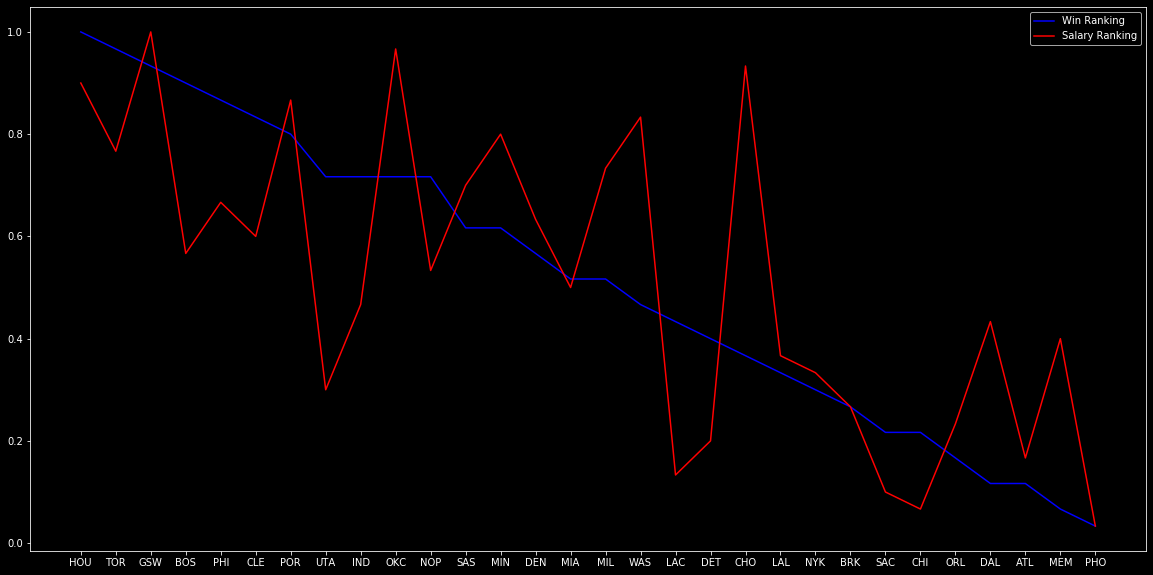

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot the stats as a line chart
plt.figure(figsize=(20,10))
Win_line, = plt.plot(Teams, Wins, color="blue", label="Win Ranking",)
Salary_line, = plt.plot(Teams, Salary, color="red", label="Salary Ranking",)

# Create a legend for our chart
plt.legend(handles=[Win_line, Salary_line], loc="best")

# Show the chart
plt.style.use('dark_background')
plt.gca().xaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='y', colors='white')


plt.show()
plt.tight_layout()

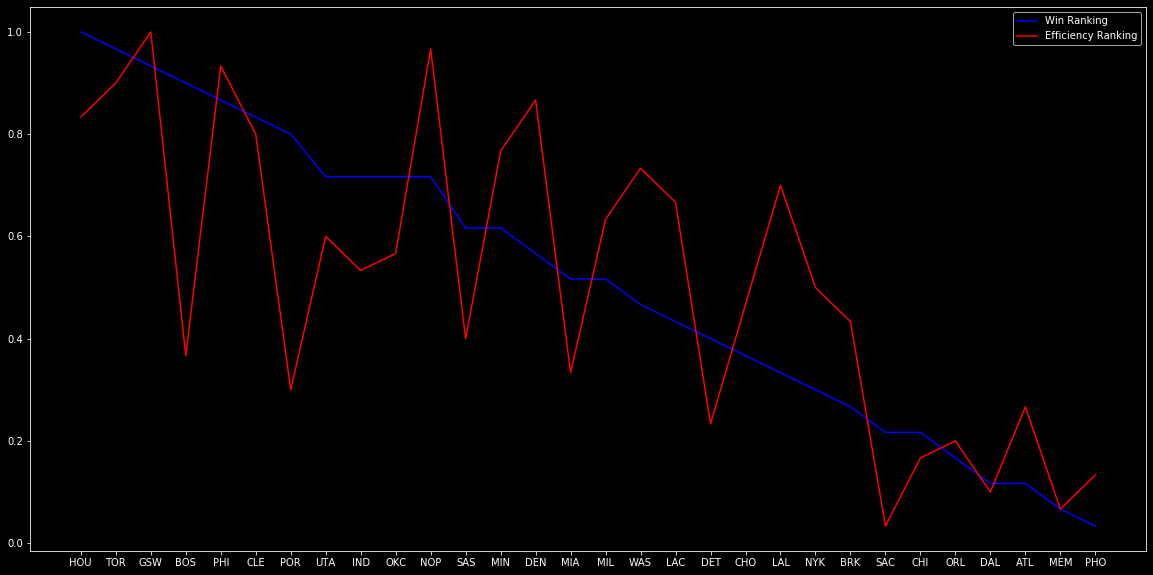

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(20,10))
Win_line, = plt.plot(Teams, Wins, color="blue", label="Win Ranking",)
Efficiency_line, = plt.plot(Teams, Efficiency, color="red", label="Efficiency Ranking",)

# Create a legend for our chart
plt.legend(handles=[Win_line, Efficiency_line], loc="best")

# Show the chart
plt.show()
plt.tight_layout()

In [ ]:
#sorted_team_df.plot(kind="barh",label="Team Results",figsize=(8,30))
#plt.legend()
#plt.show()
#plt.tight_layout()

sortedbar_team_df = sorted_team_df.sort_values("Wins Rank").set_index("Team")

sortedbar_team_df.plot(kind="barh", figsize=(20,30), title = "Team Wins vs Salary vs Efficiency", color=color_list)


In [ ]:
top_paid = per_36min_df.loc[per_36min_df['season17_18'] >= 12633854.75]
top_paid = top_paid.groupby(['Team']).count()
Top25pct_salary = top_paid['Player']

top_paid_total = per_36min_df.loc[per_36min_df['season17_18'] >= 12633854.75]
top_paid_total = top_paid_total.groupby(['Team']).sum()
Top25pct_total_salary = top_paid_total['season17_18']

team_salary = per_36min_df.groupby(['Team']).sum()
team_salary = team_salary['season17_18']

top_eff = per_game.loc[per_game['Efficiency'] >= 14.6]
top_eff = top_eff.groupby(['Team']).count()
Top25pct_eff = top_eff['Player']

top_eff_total = per_game.loc[per_game['Efficiency'] >= 14.6]
top_eff_total = top_eff_total.groupby(['Team']).sum()
Top25pct_total_eff = top_eff_total['Efficiency']

team_eff = season_stats_df[['Team','W','Team Efficiency Rating',]]

summary_df = pd.DataFrame({'Count Top 25% Salaries': Top25pct_salary,
                           'Total Top 25% Salaries': Top25pct_total_salary,
                          'Total Team Salary': team_salary,
                           'Count Top 25% Efficiency': Top25pct_eff,
                           'Total Top 25% Efficiency': Top25pct_total_eff})

summary_df = summary_df.reset_index()
summary_df = summary_df.rename(columns={'index':'Team'})

summary_table_df = pd.merge(team_eff,summary_df, on= "Team", how="outer")
summary_table_df = summary_table_df[["Team","W","Count Top 25% Salaries","Total Top 25% Salaries","Total Team Salary","Count Top 25% Efficiency","Total Top 25% Efficiency","Team Efficiency Rating"]]
summary_table_df['Total Top 25% Salaries/Total Team Salary'] = summary_table_df['Total Top 25% Salaries']/summary_table_df['Total Team Salary']
summary_table_df['Total Top 25% Efficiency/Team Efficiency Rating'] = summary_table_df['Total Top 25% Efficiency']/summary_table_df['Team Efficiency Rating']
summary_table_df.head()

In [ ]:

wins_rank = sorted_team_df[['Team','Wins Rank']]

summary_table_df = pd.merge(wins_rank,summary_table_df, on= "Team", how="outer")
summary_table_df = summary_table_df.loc[summary_table_df['Team'] != 'TOT']

summary_table_df.head()

In [ ]:
summary_table_df["Top 25% Salary Rank"] = summary_table_df['Total Top 25% Salaries/Total Team Salary'].rank(pct=True)
summary_table_df["Top 25% Efficiency Rank"] = summary_table_df['Total Top 25% Efficiency/Team Efficiency Rating'].rank(pct=True)

In [ ]:
Teams = summary_table_df["Team"]
Salary = summary_table_df["Top 25% Salary Rank"]
Wins = summary_table_df["Wins Rank"]
Efficiency = summary_table_df["Top 25% Efficiency Rank"]
color_list = ['b', 'g', 'y', 'c']

plt.figure(figsize=(20,10))
Win_line, = plt.plot(Teams, Wins, color="blue", label="Win Ranking",)
Efficiency_line, = plt.plot(Teams, Efficiency, color="red", label="Efficiency Ranking",)

# Create a legend for our chart
plt.legend(handles=[Win_line, Salary_line], loc="best")

# Show the chart
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,10))
Win_line, = plt.plot(Teams, Wins, color="blue", label="Win Ranking",)
Salary_line, = plt.plot(Teams, Salary, color="green", label="Salary Ranking",)

# Create a legend for our chart
plt.legend(handles=[Win_line, Salary_line], loc="best")

# Show the chart
plt.show()
plt.tight_layout()